In [23]:
import numpy as np
import matplotlib.pyplot as plt 
versicolor_petal_length = [1,5,4,6,5,4,4,4,2]

# Manually calculating variance: 
differences = versicolor_petal_length - np.mean(versicolor_petal_length)
diff_sq = list(map(lambda x: x**2, differences))
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

print(variance_explicit, variance_np)


2.0987654321 2.0987654321


In [6]:
# Standard deviation is the sqrt of the variance 
# Print the square root of the variance
std = np.sqrt(variance_np)
print(std)

# Print the standard deviation
print(np.std(versicolor_petal_length))

1.4487116456
1.4487116456


In [21]:
# Covariance is a measure of correlation 
np.cov([1,2,4,8,16], [2,4,8,16, 16])
# Outputs a covariance matrix of [[var_x, cov], [cov, var_y]]

# Pearson correlation is covariance/(std_x * std_y)
# It is a measure of the ratio of variability due to codependence compared to independent variability. 
def pearson_r(x, y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

r = pearson_r([1,2,4,8,16], [2,4,8,16, 31])
# Print the result

print(r)




0.999861188379


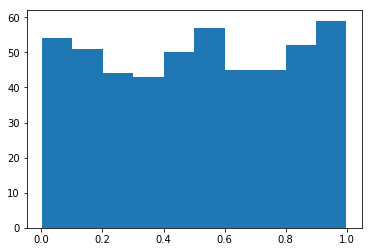

In [30]:
# Bernoulli trial: Has outcome of either true or false 
np.random.seed(43)
random_numbers = np.empty(500)
for i in range(500):
    random_numbers[i] = np.random.random()
_ = plt.hist(random_numbers)
plt.show()


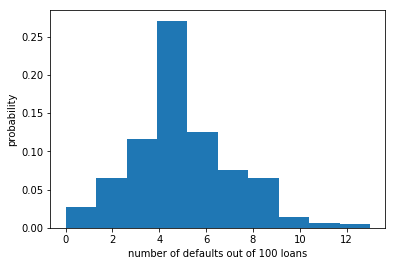

In [34]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0
    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success
perform_bernoulli_trials(5, 0.2)
# Seed random number generator
np.random.seed(41412222)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot

plt.show()

In [35]:
# PMF = a probability mass function (pmf) is a function that gives the probability 
# that a discrete random variable is exactly equal to some value



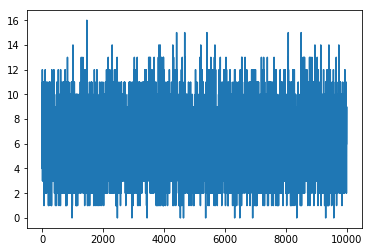

In [40]:
# plt.clrf()
samples = np.random.binomial(60, 0.1, size=10000)
plt.plot(samples)
plt.show()

In [41]:
# cumulative distribution function (CDF) of a real-valued random variable X, 
# or just distribution function of X, 
# is the probability that X will take a value less than or equal to x.

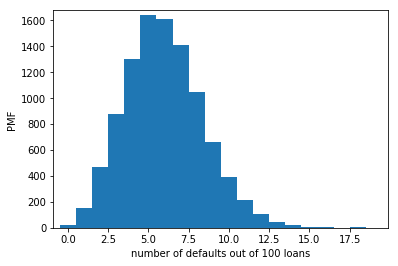

In [3]:
# Poisson distribution is a random distribution. 
import numpy as np
import matplotlib.pyplot as plt 
n_defaults = np.random.poisson(6, size=10000)
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
# Generate histogram
plt.hist(n_defaults, bins=bins)

# Set margins
plt.margins(0.02)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

# Show the plot
plt.show()


In [6]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
   
for i in range(3):
    samples_binomial =  np.random.binomial(n[i], p[i], 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))
# The means are all about the same,
# The standard deviation of the Binomial distribution gets closer and closer to that of 
# the Poisson distribution as the probability p gets lower and lower.
# When we have rare events (low p, high n), the Binomial distribution is Poisson. 
# This has a single parameter, the mean number of successes per time interval,

Poisson:      10.0157 3.17780639907
n = 20 Binom: 9.9741 2.2349561942
n = 100 Binom: 9.9921 3.01788627851
n = 1000 Binom: 9.9947 3.15978985219


In [7]:
# Prob dist of continuous variables. 
# PDF (probability density function) is the continuous analogue to the PMF (porbability mass function)
# PDF can be derived from CDF (cumulative distribution function)

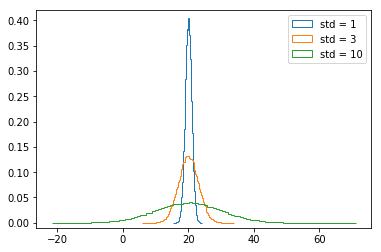

In [8]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10

samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

plt.hist(samples_std1, normed=True, histtype='step', bins=100)
plt.hist(samples_std3, normed=True, histtype='step', bins=100)
plt.hist(samples_std10, normed=True, histtype='step', bins=100)

# Make histograms




# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()




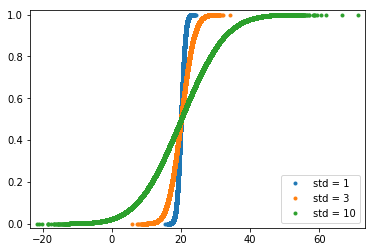

In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1 ) / n

    return x, y
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)


# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')


# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


In [17]:
mu = 149.22101123595507
sigma = 1.627816471774816
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = sum(samples < 144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.000639


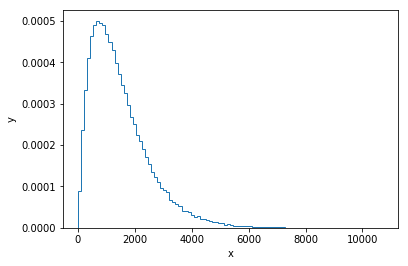

In [20]:
# How long must we wait to see both a no-hitter and a batter hit the cycle?
# This function describes the waiting time for two successive poisson-distributed events to have both fired. 
# Each tau is an individual waiting time. 
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
plt.hist(waiting_times, normed=True, histtype='step', bins=100)


# Label axes
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# The mean waiting time for a no-hitter is 764 games, 
# and the mean waiting time for hitting the cycle is 715 games.

